4096.0
128.0


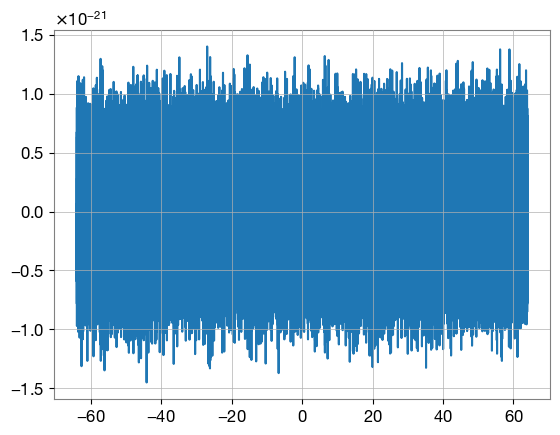

In [50]:
from pycbc.frame import read_frame
import matplotlib.pyplot as plt

data = read_frame('/Users/ngalanis/Documents/GW_Data_Workshop/challenge2.gwf', 'H1:CHALLENGE2')

print(data.sample_rate)
print(data.duration)

plt.plot(data.sample_times, data)
plt.show()

In [ ]:
import pylab

t, f, q = data.qtransform(delta_t=0.001, frange=(30, 1000))

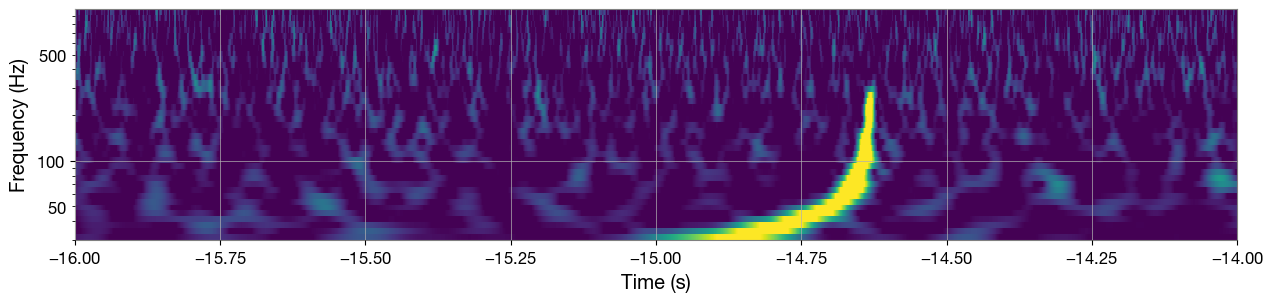

In [27]:
pylab.figure(figsize=[15, 3])
pylab.pcolormesh(t, f, q**0.5, vmin=1, vmax=6, shading='auto')
pylab.yscale('log')
pylab.xlabel('Time (s)')
pylab.xlim(-16,-14)
pylab.ylabel('Frequency (Hz)')
pylab.show()

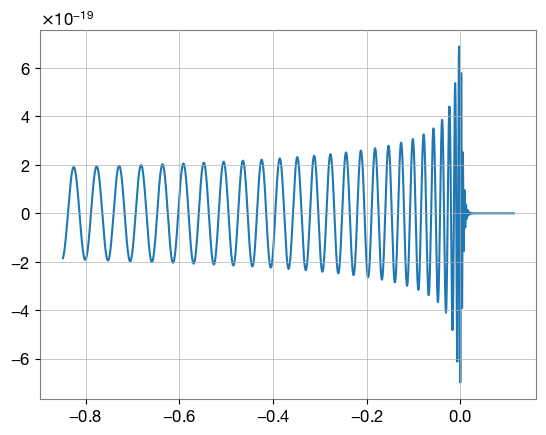

In [40]:
from pycbc.waveform import get_td_waveform

hp, hc = get_td_waveform(approximant='SEOBNRv4_opt', mass1=30, mass2=30, delta_t=data.delta_t, f_lower=20)
plt.plot(hp.sample_times, hp)
plt.show()

hp.resize(len(data))

(20, 2048)

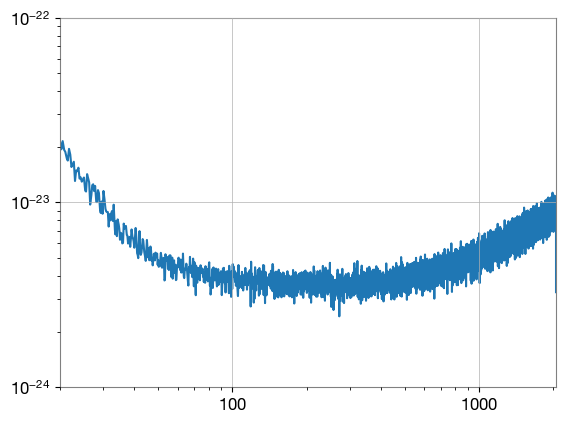

In [41]:
from pycbc.psd import interpolate

psd = data.psd(4)**0.5
psd = interpolate(psd, data.delta_f)


plt.plot(psd.sample_frequencies, psd)
plt.yscale('log')
plt.xscale('log')
plt.ylim([1e-24,1e-22])
plt.xlim([20, 2048])

<function matplotlib.pyplot.show(close=None, block=None)>

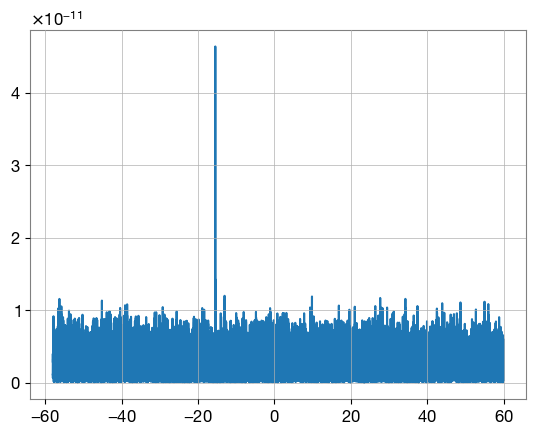

In [43]:
from pycbc.filter import matched_filter

snr = matched_filter(hp, data, psd=psd, low_frequency_cutoff=20)

snr = snr.crop(6,4)

plt.plot(snr.sample_times, abs(snr))
plt.show()

In [45]:
import numpy as np

s = np.array(snr)

print(abs(s).max()/s.std())

12.37755112002333


In [51]:
idx = abs(s).argmax()
snr.sample_times[idx]-hp.sample_times[0]

-14.6330023275